# Score in a standardised test of attainment

,score
0,91.765217
1,121.674572
2,104.895877
3,76.467947
4,85.174756


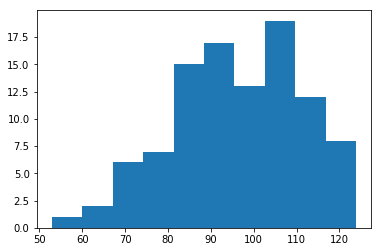

In [26]:
import numpy as np # import numpy package as np
import matplotlib.pyplot as plt # import pyplot package for plotting from matplotlib as plt
import pandas as pd # import pandas package for data manipulation as pd
mu, sigma = 95,15 # mean and standard deviation for a normal distribution
s = np.random.normal(mu, sigma, 100) # # draw 200 samples from normal distribution with mean = 95, standard deviation = 15
# assign to variable s
df = pd.DataFrame(data=s, columns = ["score"]) # create one dimensional dataframe using data in s 
# with column heading "score"; assign to variable df
plt.hist(s) # show histogram of s
df.head() # prinf girst 5 values of df


# Records of attendance

A [report on attendance](https://www.tusla.ie/uploads/content/School_Attendance_Data_2015-16.pdf) in DEIS schools was provide to Túsla, the child and family agency, by the Education Research Centre. The mean percentage of days lost by pupils in DEIS band 1 primary schools in the school year 2015/2016 was 8.1% with a standard deviation of 2.76 (from 174 schools sampled).
